Module 7 Project

2/26/2023

Kelly Simmons

Task 2. 15.2

In [85]:
from sklearn.datasets import load_digits

digits_datasets = load_digits()

In [90]:
print(digits.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [91]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [92]:
digits.data.shape

(1797, 64)

In [94]:
digits.target.shape

(1797,)

In [95]:
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

In [96]:
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

In [97]:
digits.images[22]

array([[ 0.,  0.,  8., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  1., 13., 11., 16.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  0., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  3.,  1., 16.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0., 14., 15.,  8.,  8.,  3.,  0.],
       [ 0.,  0.,  7., 12., 12., 12., 13.,  1.]])

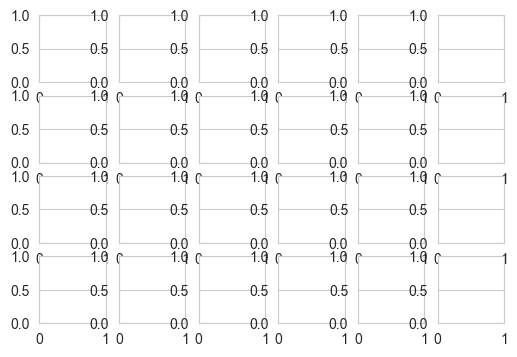

In [99]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

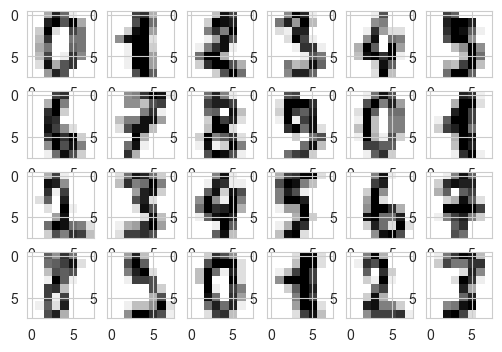

In [104]:
import numpy as np

fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

for item in zip(np.ravel(axes), digits.images, digits.target):
    ax, image, target = item
    ax.imshow(image, cmap=plt.cm.gray_r)


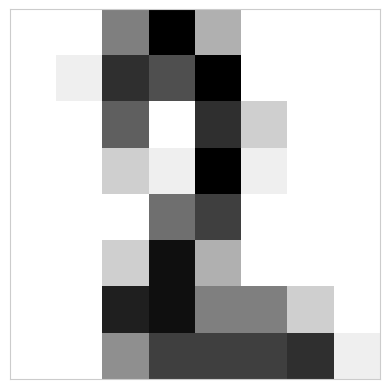

In [105]:
axes = plt.subplot()

image = plt.imshow(digits.images[22], cmap=plt.cm.gray_r)

xticks = axes.set_xticks([])

ysticks = axes.set_yticks([])

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=11)

In [107]:
X_train.shape

(1347, 64)

In [108]:
X_test.shape

(450, 64)

In [110]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [114]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

KNeighborsClassifier()

In [115]:
predicted = knn.predict(X=X_test)

expected = y_test

In [116]:
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [117]:
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [118]:
wrong = [(p, e) for (p, e)in zip(predicted, expected) if p != e]

wrong

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

In [119]:
print(f'{knn.score(X_test, y_test):.2%}')

97.78%


In [120]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [121]:
confusion

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]], dtype=int64)

In [122]:
from sklearn.metrics import classification_report

names = [str(digit) for digit in digits.target_names]

In [123]:
print(classification_report(expected, predicted,
      target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [124]:
import pandas as pd

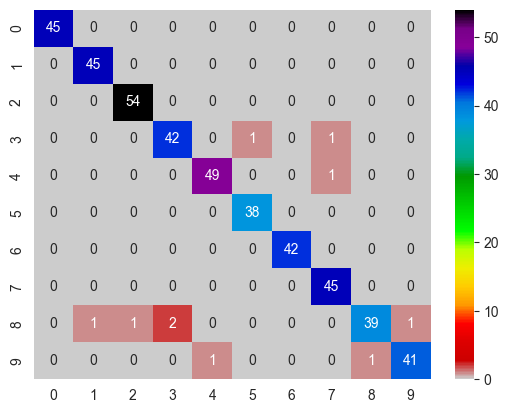

In [125]:
confusion_df = pd.DataFrame(confusion, index=range(10),
    columns=range(10))

import seaborn as sns

axes = sns.heatmap(confusion_df, annot=True,
                   cmap='nipy_spectral_r')

In [134]:
from sklearn.model_selection import KFold

In [135]:
Kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [137]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits

In [138]:
digits = load_digits()
knn = KNeighborsClassifier()

In [142]:
# Create a KFold instance with 5 splits
kf = KFold(n_splits=10, shuffle=True)

In [143]:
# Use cross_val_score with the kf instance
scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kf)

In [144]:
scores

array([0.97777778, 0.97777778, 0.98333333, 0.98888889, 0.98333333,
       1.        , 0.99444444, 0.99441341, 0.98882682, 0.98324022])

In [146]:
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

In [147]:
estimator = {
    'KNeighborsClassifier': knn,
    'SVC': SVC(gamma='scale'),
    'GaussianNB': GaussianNB()}

In [151]:
for estimator_name, estimator_object in estimator.items():
    kfold =KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
        X=digits.data, y=digits.target, cv=kfold)
    print(f'{estimator_name:>20}: ' +
          f'mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=98.72%; standard deviation=0.75%
                 SVC: mean accuracy=98.72%; standard deviation=0.79%
          GaussianNB: mean accuracy=84.48%; standard deviation=3.47%


In [154]:
for k in range(1, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn,
        X=digits.data, y=digits.target, cv=kfold)
    print(f'k={k:<22}; mean accuracy={scores.mean():.2%}; '+
          f'standard deviation={scores.std():.2%}')


k=1                     ; mean accuracy=98.83%; standard deviation=0.58%
k=3                     ; mean accuracy=98.83%; standard deviation=0.72%
k=5                     ; mean accuracy=98.72%; standard deviation=0.75%
k=7                     ; mean accuracy=98.44%; standard deviation=0.96%
k=9                     ; mean accuracy=98.39%; standard deviation=0.80%
k=11                    ; mean accuracy=98.39%; standard deviation=0.80%
k=13                    ; mean accuracy=97.89%; standard deviation=0.89%
k=15                    ; mean accuracy=97.89%; standard deviation=1.02%
k=17                    ; mean accuracy=97.55%; standard deviation=1.06%
k=19                    ; mean accuracy=97.66%; standard deviation=0.96%


15.4 Case Study

In [8]:
%matplotlib inline

In [9]:
c = lambda f: 5 / 9 * (f - 32)

In [10]:
temps = [(f, c(f)) for f in range(0, 101, 10)]

In [11]:
import pandas as pd

In [12]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

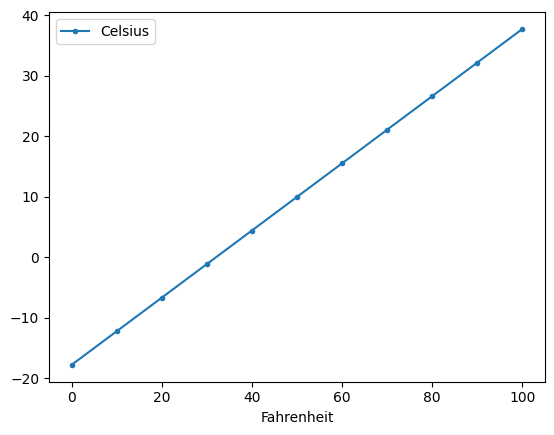

In [14]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

In [15]:
y_label = axes.set_ylabel('Celsius')

New York City Temperature Data

In [4]:
import pandas as pd

In [17]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [19]:
nyc.head()


,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [18]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


In [20]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [21]:
nyc.Date.dtype

dtype('int64')

In [22]:
nyc.Date = nyc.Date.floordiv(100)

nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [25]:
nyc.Temperature.describe().round(2)

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

In [28]:
pip install scipy

     ---------------------------------------- 42.2/42.2 MB 4.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
from scipy import stats

linear_regression = stats.linregress(x=nyc.Date,
                                     y=nyc.Temperature)

In [30]:
linear_regression.slope

0.014771361132966163

In [31]:
linear_regression.intercept

8.694993233674289

In [32]:
linear_regression.slope * 2019 + linear_regression.intercept

38.51837136113297

In [33]:
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

In [35]:
pip install seaborn


     -------------------------------------- 293.3/293.3 kB 2.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


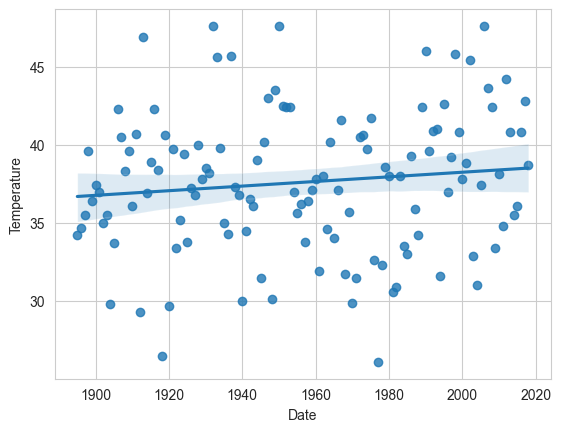

In [36]:
import seaborn as sns

sns.set_style('whitegrid')

axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

In [37]:
axes.set_ylim(10, 70)

(10.0, 70.0)

15.4 Case Study: Time Series and Simple Linear Regression

In [38]:
import pandas as pd

In [39]:
pip install sklearn


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'


  DEPRECATION: sklearn is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
%pip install -U scikit-learn

     ---------------------------------------- 8.2/8.2 MB 20.2 MB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    nyc.Date.values.reshape(-1, 1), nyc.Temperature.values,
    random_state=11)

In [43]:
X_train.shape

(93, 1)

In [44]:
X_test.shape

(31, 1)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
linear_regression = LinearRegression()

In [47]:
linear_regression.fit (X=X_train, y=y_train)

LinearRegression()

In [52]:
lr = LinearRegression(copy_X=True, fit_intercept=True)

In [53]:
linear_regression.coef_

array([0.01939167])

In [55]:
linear_regression.intercept_

-0.30779820252656975

In [56]:
predicted = linear_regression.predict(X_test)

expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, ecpected: {e:.2f}')

predicted: 37.86, ecpected: 31.70
predicted: 38.69, ecpected: 34.80
predicted: 37.00, ecpected: 39.40
predicted: 37.25, ecpected: 45.70
predicted: 38.05, ecpected: 32.30
predicted: 37.64, ecpected: 33.80
predicted: 36.94, ecpected: 39.70


In [57]:
predict = (lambda x: linear_regression.coef_*x+
           linear_regression.intercept_)

In [58]:
predict(2019)

array([38.84399018])

In [59]:
predict(1890)

array([36.34246432])

In [64]:
import seaborn as sns

In [65]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

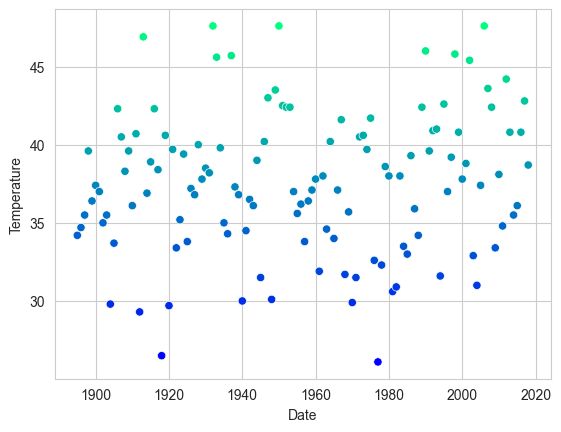

In [68]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
                      hue='Temperature', palette='winter', legend=False)

In [69]:
axes.set_ylim(10, 70)

(10.0, 70.0)

In [70]:
import numpy as np

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

In [71]:
y = predict(x)

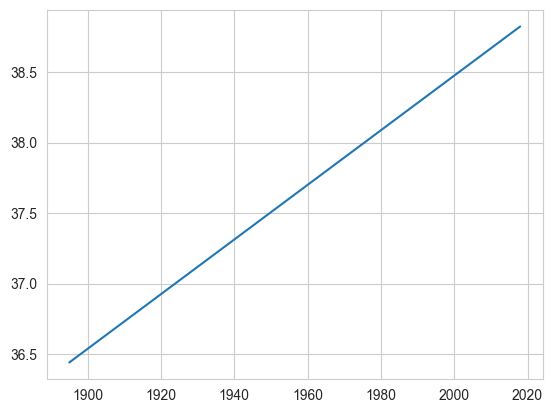

In [72]:
import matplotlib.pyplot as plt

line = plt.plot(x, y)